This dataset from NASA contains tens of thousands of observations of the levels of oxygen-18, an environmental isotope, in various locations in the ocean. In addition, most observations include data on the temperature, salinity, and more as well.

[Dataset from Kaggle](https://www.kaggle.com/tjkyner/global-seawater-oxygen18-levels)

Dataset Columns 
1. Longitude	
2. Latitude
3. Depth	- Depth from ocean surface in meters
4. pTemperature - Temperature in degrees Celsius
5. Salinity - Salinity measured in practical salinity units (salt concentration)
6. d18O - Oxygen-18 parts per thousand	
7. dD - Deuterium parts per thousand (heavy water)
8. Year	- Year of observation 
9. Month	- Month of observation
10. Reference - Source of observations

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (17,10)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gso18.csv to gso18.csv
Saving istock.jpg to istock.jpg


Import dataset, skipping all the bad lines

In [3]:
raw_df = pd.read_csv("gso18.csv",error_bad_lines=False)

b'Skipping line 521: expected 10 fields, saw 11\nSkipping line 522: expected 10 fields, saw 11\nSkipping line 523: expected 10 fields, saw 11\nSkipping line 524: expected 10 fields, saw 11\nSkipping line 525: expected 10 fields, saw 11\nSkipping line 526: expected 10 fields, saw 11\nSkipping line 527: expected 10 fields, saw 11\nSkipping line 528: expected 10 fields, saw 11\nSkipping line 529: expected 10 fields, saw 11\nSkipping line 530: expected 10 fields, saw 11\nSkipping line 531: expected 10 fields, saw 11\nSkipping line 532: expected 10 fields, saw 11\nSkipping line 533: expected 10 fields, saw 11\nSkipping line 534: expected 10 fields, saw 11\nSkipping line 535: expected 10 fields, saw 11\nSkipping line 536: expected 10 fields, saw 11\nSkipping line 537: expected 10 fields, saw 11\nSkipping line 538: expected 10 fields, saw 11\nSkipping line 539: expected 10 fields, saw 11\nSkipping line 540: expected 10 fields, saw 11\nSkipping line 541: expected 10 fields, saw 11\nSkipping li

error_bad_lines=False removes all rows with missing values

In [4]:
#Make copy of Dataframe
df = raw_df.copy()

In [5]:
df.shape


(25109, 10)

The dataset has 25 109 rows and 10 columns 

In [6]:
df.head()

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
0,31.4,81.27,3,-1.66,34.09,0.25,**,1987,7,Bauch et al (1995)
1,31.4,81.27,9,-1.66,34.11,0.11,**,1987,7,Bauch et al (1995)
2,31.4,81.27,20,-1.64,34.15,0.24,**,1987,7,Bauch et al (1995)
3,31.4,81.27,40,-1.14,34.45,0.14,**,1987,7,Bauch et al (1995)
4,31.4,81.27,59,-0.45,34.68,0.27,**,1987,7,Bauch et al (1995)


In [7]:
df.tail()

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
25104,40.13,-52.5,2009,0.89,34.72,-0.09,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25105,40.13,-52.5,2260,0.60,34.70,-0.14,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25106,40.13,-52.5,2508,0.38,34.69,-0.12,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25107,40.13,-52.5,2757,0.06,34.68,-0.22,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25108,40.13,-52.5,2833,-0.06,34.67,-0.22,**,1993,4,SWINDEX (K.J. Heywood pers. communication)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25109 entries, 0 to 25108
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     25109 non-null  float64
 1   Latitude      25109 non-null  float64
 2   Depth         25109 non-null  int64  
 3   pTemperature  25109 non-null  object 
 4   Salinity      25109 non-null  object 
 5   d18O          25109 non-null  object 
 6   dD            25109 non-null  object 
 7   Year          25109 non-null  object 
 8   Month         25109 non-null  object 
 9   Reference     25109 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.9+ MB


# Data cleaning and Prep 

The dataset has a few place where the char '**' are inserted as missing values, we will remove all rolls with these chars

In [9]:
df.dD.unique()

array(['**', '-53.0', '-52.0', '-48.0', '-42.0', '-39.0', '-40.0',
       '-49.0', '-41.0', '-51.0', '-54.0', '-35.0', '-47.0', '-55.0',
       '-61.0', '-46.0', '-57.0', '-60.0', '-56.0', '-50.0', '-45.0',
       '-15.0', '-36.0', '-5.0', '1.4', '1.7', '2.1', '1.8', '1.9', '0.9',
       '0.6', '-0.3', '-0.5', '-0.8', '-0.6', '-1.0', '-1.3', '-1.1',
       '-0.1', '-0.7', '2.5', '3.4', '3.8', '4.3', '4.5', '3.5', '3.6',
       '3.9', '2.7', '2.0', '-1.6', '-2.1', '-1.9', '-1.4', '-2.0',
       '-0.4', '0.2', '0.1', '0.3', '-0.2', '1.3', '1.6', '0.7', '0.8',
       '0.0', '2.9', '3.3', '3.2', '3.1', '2.8', '1.1', '2.4', '2.3',
       '0.5', '4.2', '3.7', '2.6', '4.0', '1.5', '0.4', '-7.3', '-7.5',
       '5.2', '4.7', '5.1', '5.5', '4.4', '-2.9', '-3.3', '-3.2', '-2.7',
       '-4.2', '-3.1', '-3.7', '-2.8', '-2.4', '-2.6', '8.4', '7.4',
       '8.0', '8.3', '7.5', '8.1', '8.2', '7.8', '10.4', '9.1', '10.3',
       '8.6', '9.7', '8.7', '6.4', '6.6', '7.6', '7.0', '7.9', '8.9',
       '7

In [10]:
df.loc[df['Reference'] == '**']

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference


In [11]:
df.loc[df['Salinity'] == '**']

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
61,30.56,84.03,5,-1.79,**,-0.37,**,1987,7,Bauch et al (1995)
72,30.56,84.03,188,1.20,**,0.22,**,1987,7,Bauch et al (1995)
91,30.56,84.03,2066,-0.88,**,0.28,**,1987,7,Bauch et al (1995)
3077,120.00,38.50,0,**,**,-0.50,**,1984,9,Shi-Ying (1991)
3078,123.00,36.00,10,**,**,-1.17,**,1985,2,Shi-Ying (1991)
...,...,...,...,...,...,...,...,...,...,...
21466,-79.00,62.00,155,**,**,-2.98,**,1982,8,Tan and Strain (1980/3/5-1996)
21665,-72.76,62.84,0,**,**,-2.67,**,1982,9,Tan and Strain (1980/3/5-1996)
22075,-94.85,9.82,0,**,**,-0.04,**,2001,10,Benway and Mix (2004)
22104,-95.39,2.81,0,**,**,0.49,**,2001,10,Benway and Mix (2004)


In [12]:
df.loc[df['Month'] == '**']

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
450,0.00,70.00,5,8.56,35.17,0.31,**,1985,**,Bauch et al (1995)
451,0.00,70.00,10,8.48,35.13,0.33,**,1985,**,Bauch et al (1995)
452,0.00,70.00,49,5.86,35.12,0.32,**,1985,**,Bauch et al (1995)
453,0.00,70.00,99,5.31,35.11,0.36,**,1985,**,Bauch et al (1995)
454,0.00,70.00,198,4.63,35.12,0.33,**,1985,**,Bauch et al (1995)
...,...,...,...,...,...,...,...,...,...,...
19976,-31.85,68.13,30,**,31.19,-2.50,**,**,**,Azetsu-Scott and Tan (1997)
19977,-31.85,68.13,50,**,32.07,-2.26,**,**,**,Azetsu-Scott and Tan (1997)
19978,-31.85,68.13,100,**,32.56,-1.09,**,**,**,Azetsu-Scott and Tan (1997)
19979,-31.85,68.13,200,**,34.06,-0.33,**,**,**,Azetsu-Scott and Tan (1997)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25109 entries, 0 to 25108
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     25109 non-null  float64
 1   Latitude      25109 non-null  float64
 2   Depth         25109 non-null  int64  
 3   pTemperature  25109 non-null  object 
 4   Salinity      25109 non-null  object 
 5   d18O          25109 non-null  object 
 6   dD            25109 non-null  object 
 7   Year          25109 non-null  object 
 8   Month         25109 non-null  object 
 9   Reference     25109 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.9+ MB


Convert d18O,dD,pTemperature,Salinity columns from object to numeric values and replace  '**' with NAN, or where errors are found.

In [14]:
df['d18O'] = pd.to_numeric(df.d18O, errors='coerce')
df['dD'] = pd.to_numeric(df.dD, errors='coerce')
df['pTemperature'] = pd.to_numeric(df.pTemperature, errors='coerce')
df['Salinity'] = pd.to_numeric(df.Salinity, errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25109 entries, 0 to 25108
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     25109 non-null  float64
 1   Latitude      25109 non-null  float64
 2   Depth         25109 non-null  int64  
 3   pTemperature  20334 non-null  float64
 4   Salinity      22843 non-null  float64
 5   d18O          24785 non-null  float64
 6   dD            1005 non-null   float64
 7   Year          25109 non-null  object 
 8   Month         25109 non-null  object 
 9   Reference     25109 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.9+ MB


In [16]:
df.head()

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
0,31.4,81.27,3,-1.66,34.09,0.25,NaN,1987,7,Bauch et al (1995)
1,31.4,81.27,9,-1.66,34.11,0.11,NaN,1987,7,Bauch et al (1995)
2,31.4,81.27,20,-1.64,34.15,0.24,NaN,1987,7,Bauch et al (1995)
3,31.4,81.27,40,-1.14,34.45,0.14,NaN,1987,7,Bauch et al (1995)
4,31.4,81.27,59,-0.45,34.68,0.27,NaN,1987,7,Bauch et al (1995)


Concatinate Year and Month, converting to datetime object, setting Date as index and dropping Year and Month columns

In [17]:
df['Date']=pd.to_datetime(df['Year'] +"/"+ df['Month'],errors='coerce')

In [18]:
df= df.set_index('Date')
df = df.drop(['Year', 'Month'], axis=1)

In [19]:
df.head()

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Reference
Date,,,,,,,,
1987-07-01,31.4,81.27,3,-1.66,34.09,0.25,NaN,Bauch et al (1995)
1987-07-01,31.4,81.27,9,-1.66,34.11,0.11,NaN,Bauch et al (1995)
1987-07-01,31.4,81.27,20,-1.64,34.15,0.24,NaN,Bauch et al (1995)
1987-07-01,31.4,81.27,40,-1.14,34.45,0.14,NaN,Bauch et al (1995)
1987-07-01,31.4,81.27,59,-0.45,34.68,0.27,NaN,Bauch et al (1995)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25109 entries, 1987-07-01 to 1993-04-01
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     25109 non-null  float64
 1   Latitude      25109 non-null  float64
 2   Depth         25109 non-null  int64  
 3   pTemperature  20334 non-null  float64
 4   Salinity      22843 non-null  float64
 5   d18O          24785 non-null  float64
 6   dD            1005 non-null   float64
 7   Reference     25109 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
df.describe()

,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD
count,25109.000000,25109.000000,25109.000000,20334.000000,22843.000000,24785.000000,1005.000000
mean,4.770582,32.413276,569.583894,2.878107,33.304865,-0.589688,-1.593333
std,89.694954,53.826587,986.178891,6.349982,4.486179,2.019906,11.470278
min,-179.980000,-77.640000,-999.000000,-2.120000,-13.000000,-20.600000,-61.000000
25%,-54.080000,1.880000,20.000000,-0.790000,33.190000,-0.680000,-2.000000
50%,0.000000,57.780000,117.000000,0.710000,34.580000,-0.100000,-0.100000
75%,66.330000,75.000000,600.000000,3.220000,34.880000,0.250000,2.300000
max,180.000000,90.000000,9742.000000,38.770000,41.600000,5.880000,10.400000


In [22]:
#Drop Saninity values smaller than 0 
#df.drop(df[df.Salinity < 0].index, inplace=True)

In [23]:
df['Reference'].value_counts()

Tan and Strain (1980/3/5-1996)    2067
Risebrobakken et al (2003)        1539
Frank (1996)                      1477
Abrahamsen et al (2009)           1288
VEINS (Meredith et al 2001)        971
                                  ... 
Shi-Ying (1991)                      4
Friedman et al (1961)                3
Brezgunov (1990)                     2
Yobbi (1992)                         2
Merlivat et al (1987)                1
Name: Reference, Length: 125, dtype: int64

Tan and Strain (1980/3/5-1996) is the most used reference in the dataset

In [24]:
clean_df = df.copy()

# Exploratory Analysis and Visualization 

In [25]:
# Checking missing values
pd.isnull(clean_df).any()

Longitude       False
Latitude        False
Depth           False
pTemperature     True
Salinity         True
d18O             True
dD               True
Reference       False
dtype: bool

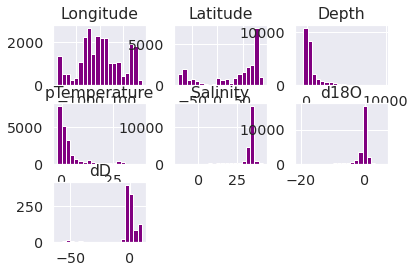

In [26]:
sns.set(font_scale=1.3)
clean_df.hist(bins=20,color="purple")
plt.show()

In [89]:
from google.colab import files
uploaded = files.upload()

Saving istock.jpg to istock.jpg


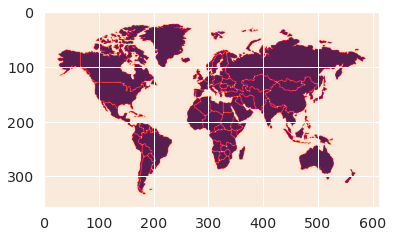

In [27]:
im = plt.imread('istock.jpg')
implot = plt.imshow(im)


plt.show()

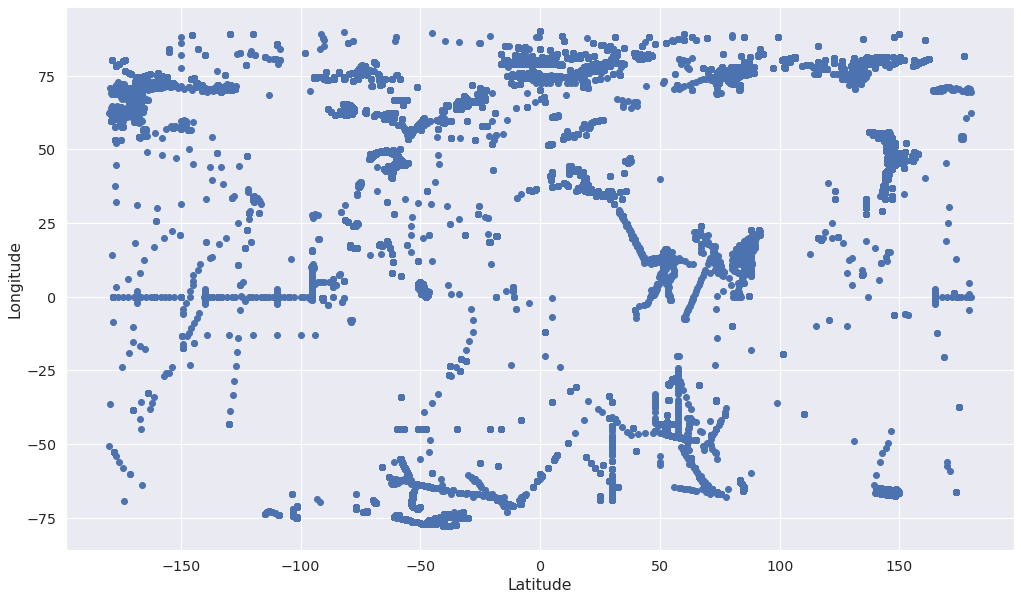

In [36]:
# We are creating a scatter plot of the two variables
plt.figure(figsize=(17,10))
plt.scatter(clean_df['Longitude'],clean_df['Latitude'])
plt.title("GPS Readings around the World")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [30]:
top_ref = df.Reference.value_counts().head(15)

In [58]:
df.Reference.value_counts().head(15)

Tan and Strain (1980/3/5-1996)    2067
Risebrobakken et al (2003)        1539
Frank (1996)                      1477
Abrahamsen et al (2009)           1288
VEINS (Meredith et al 2001)        971
Yamamoto et al (2002)              930
GEOSECS Ostlund et al (1987)       812
Mackensen et al (1996)             764
Mackensen (2001)                   716
Cox et al (2010)                   685
Cooper et al (1997)                623
Jacobs et al (2005)                563
Bauch et al (1995)                 523
Cooper et al (1999)                523
Karr and Showers (2004)            482
Name: Reference, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


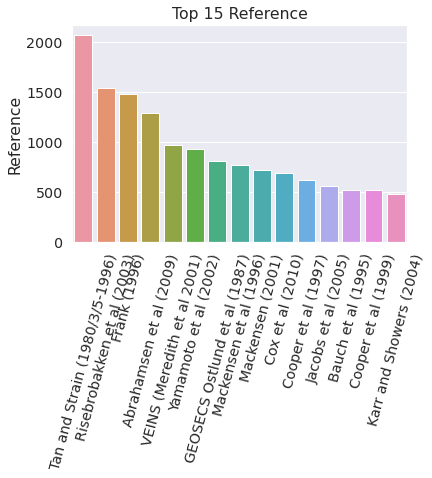

In [31]:
sns.barplot(top_ref.index, top_ref)
plt.title("Top 15 Reference")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


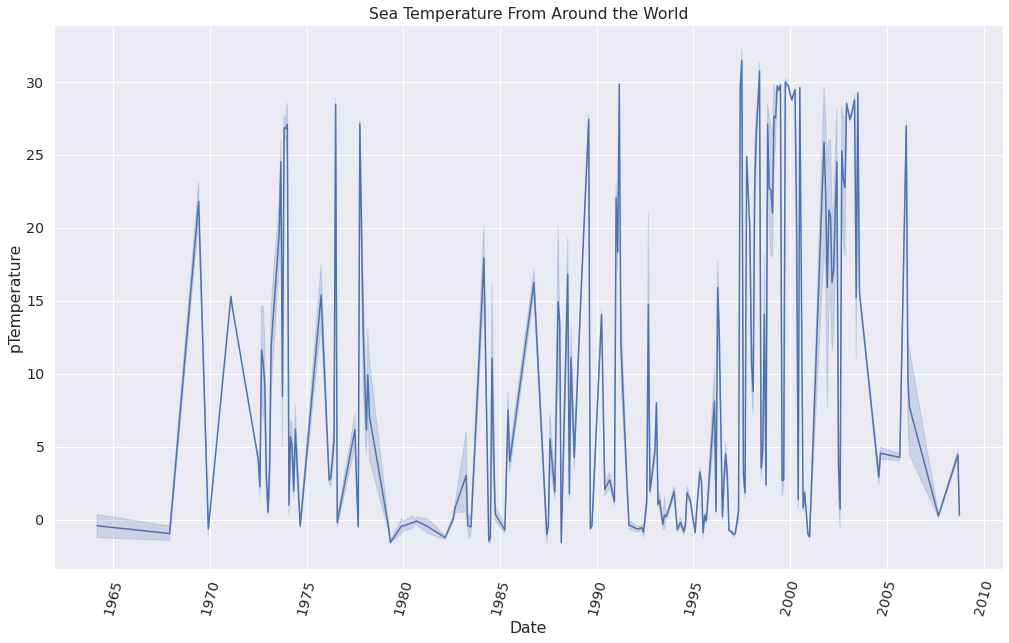

In [33]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.pTemperature)
plt.title("Sea Temperature From Around the World")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


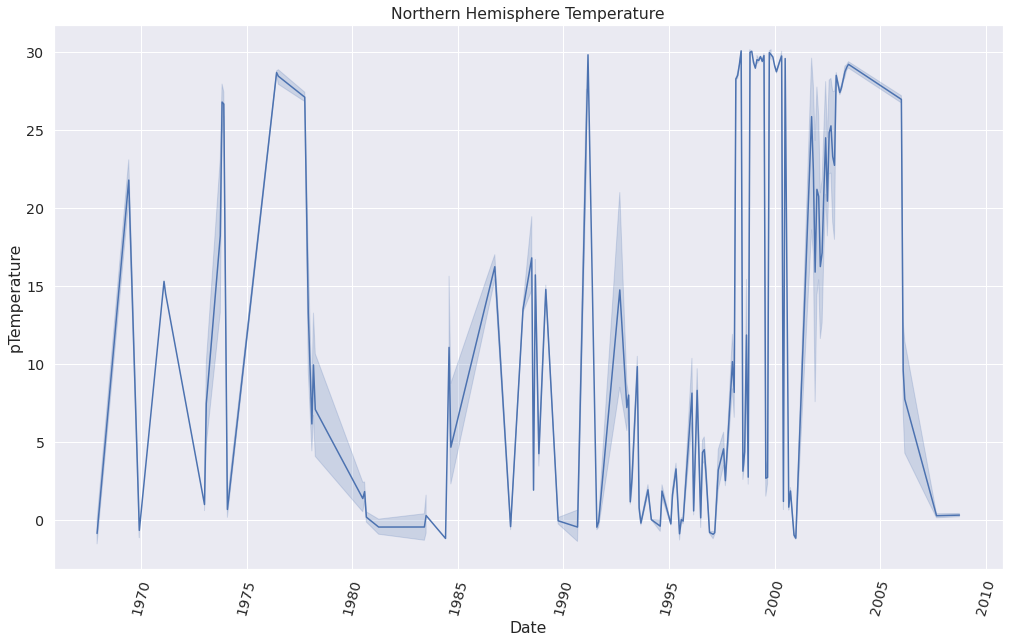

In [42]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.pTemperature.where(clean_df['Longitude'] > 0))
plt.title("Northern Hemisphere Temperature")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


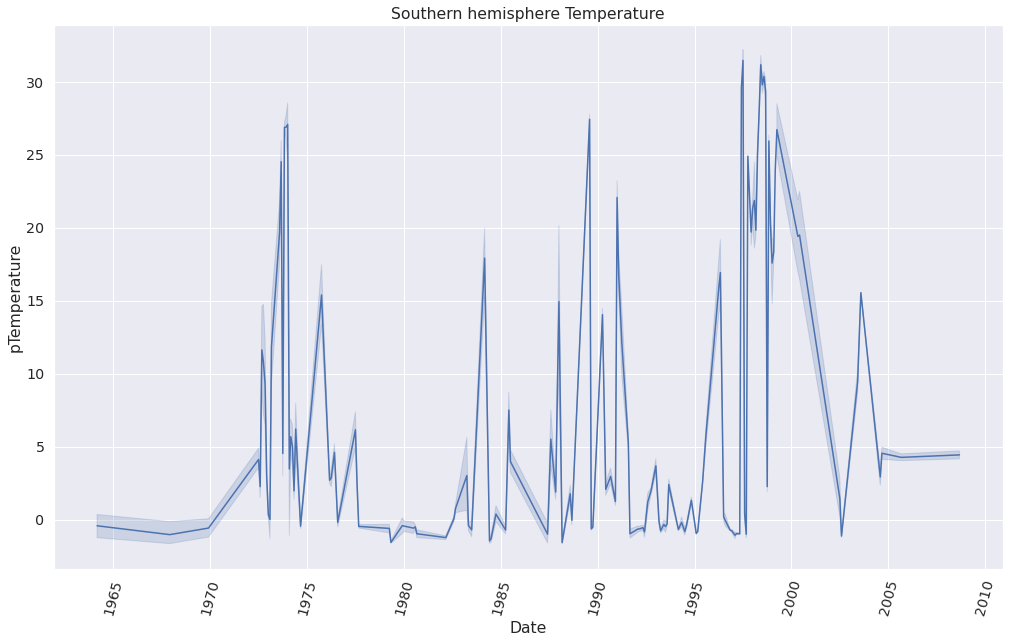

In [43]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.pTemperature.where(clean_df['Longitude'] < 0))
plt.title("Southern hemisphere Temperature")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


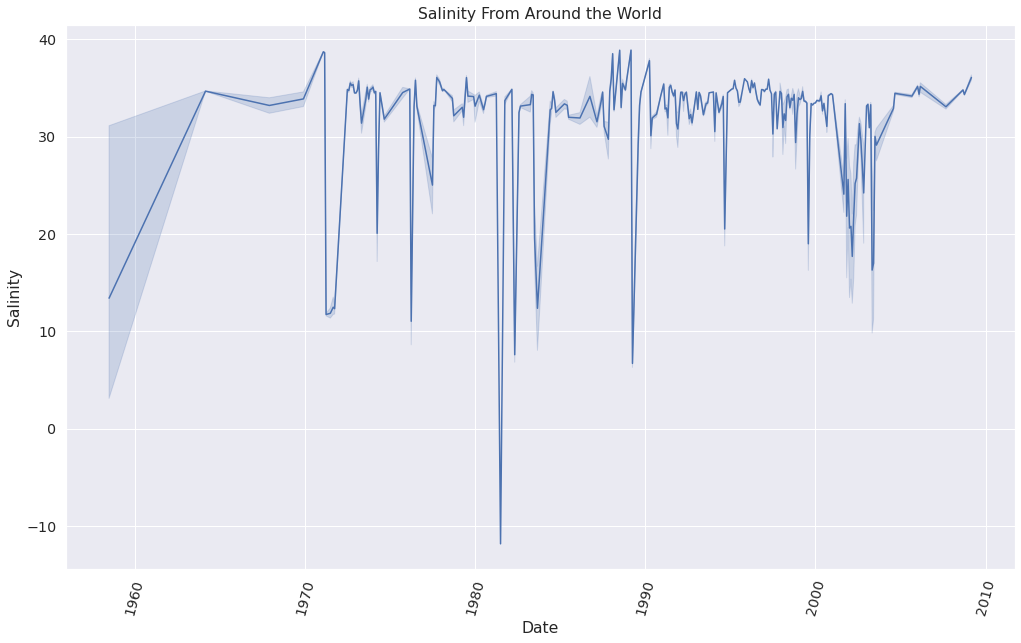

In [44]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.Salinity)
plt.title("Salinity From Around the World (PSU)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


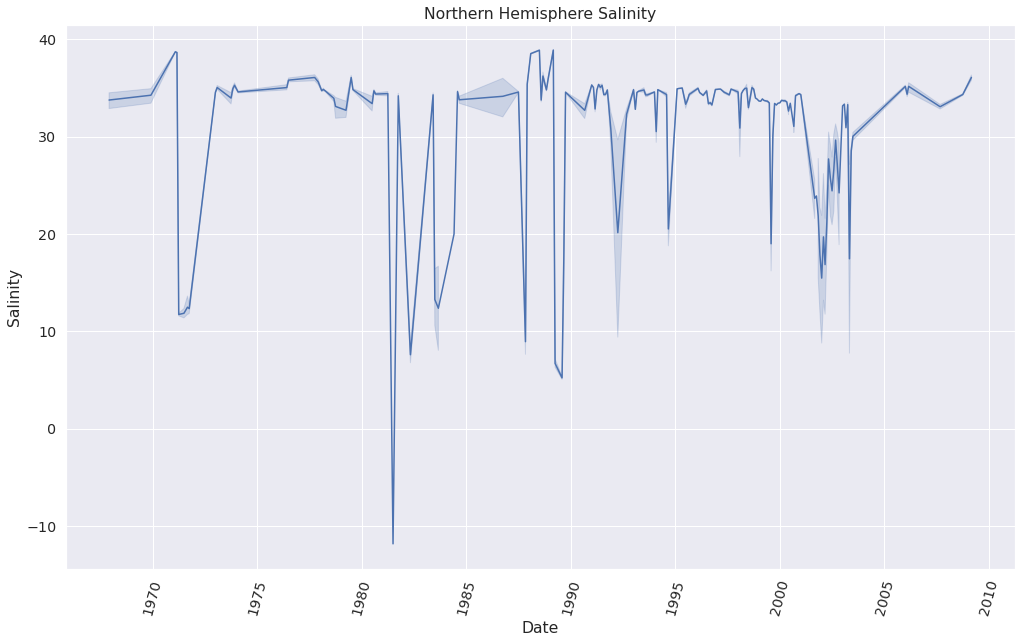

In [45]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.Salinity.where(clean_df['Longitude'] > 0))
plt.title("Northern Hemisphere Salinity (PSU)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


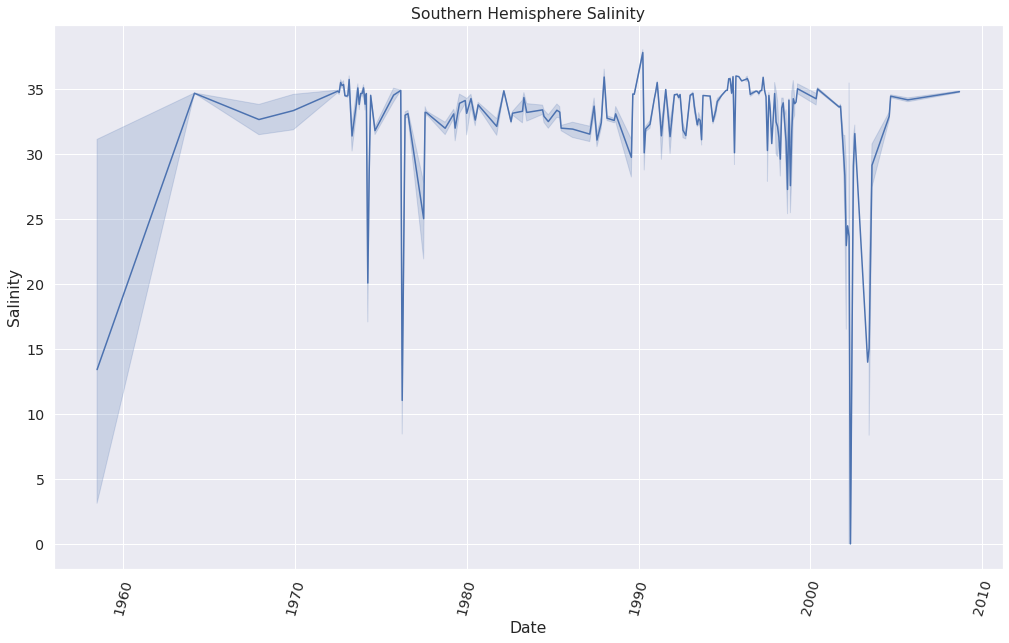

In [46]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.Salinity.where(clean_df['Longitude'] < 0))
plt.title("Southern Hemisphere Salinity (PSU)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


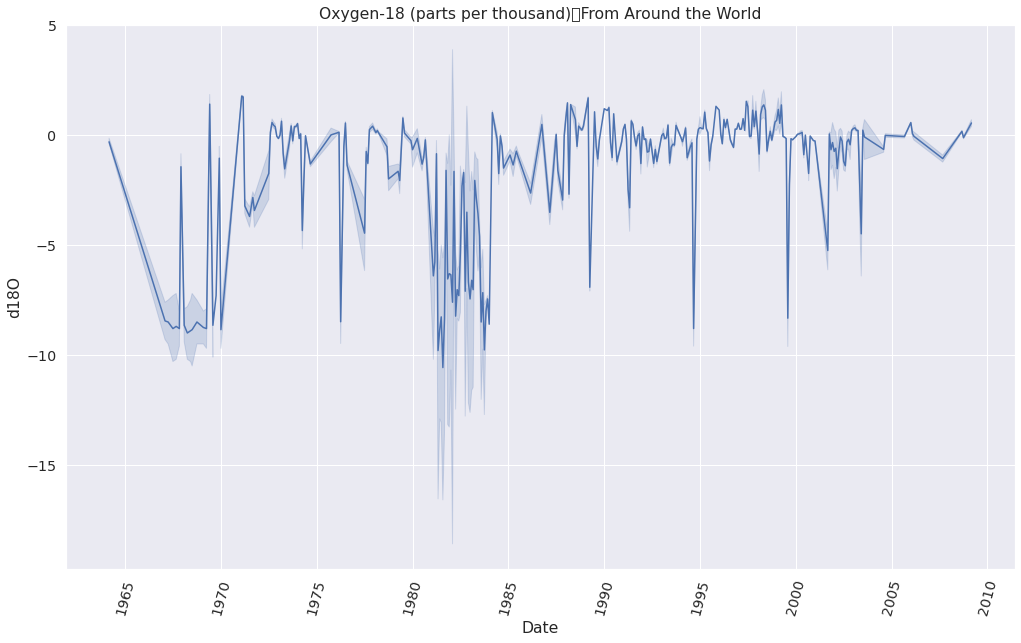

In [48]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.d18O)
plt.title("Oxygen-18 (parts per thousand)	From Around the World")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


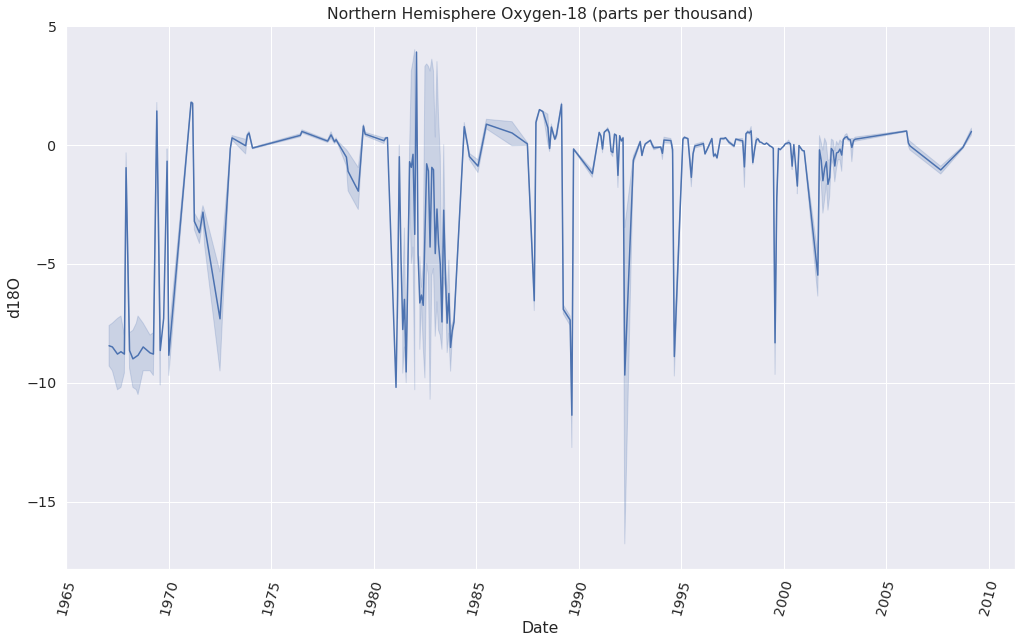

In [49]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.d18O.where(clean_df['Longitude'] > 0))
plt.title("Northern Hemisphere Oxygen-18 (parts per thousand)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


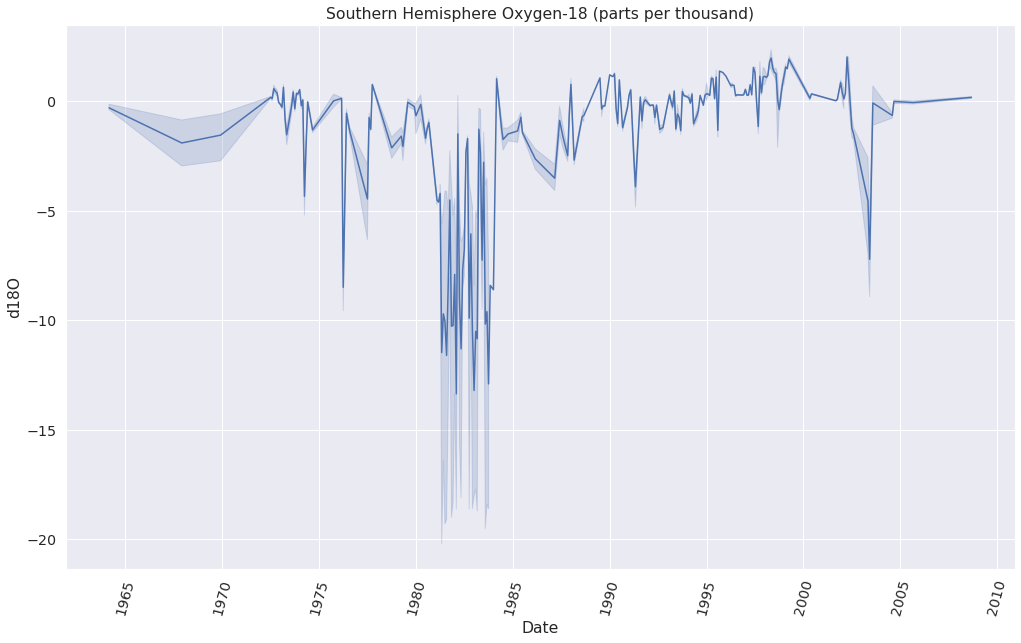

In [50]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.d18O.where(clean_df['Longitude'] < 0))
plt.title("Southern Hemisphere Oxygen-18 (parts per thousand)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


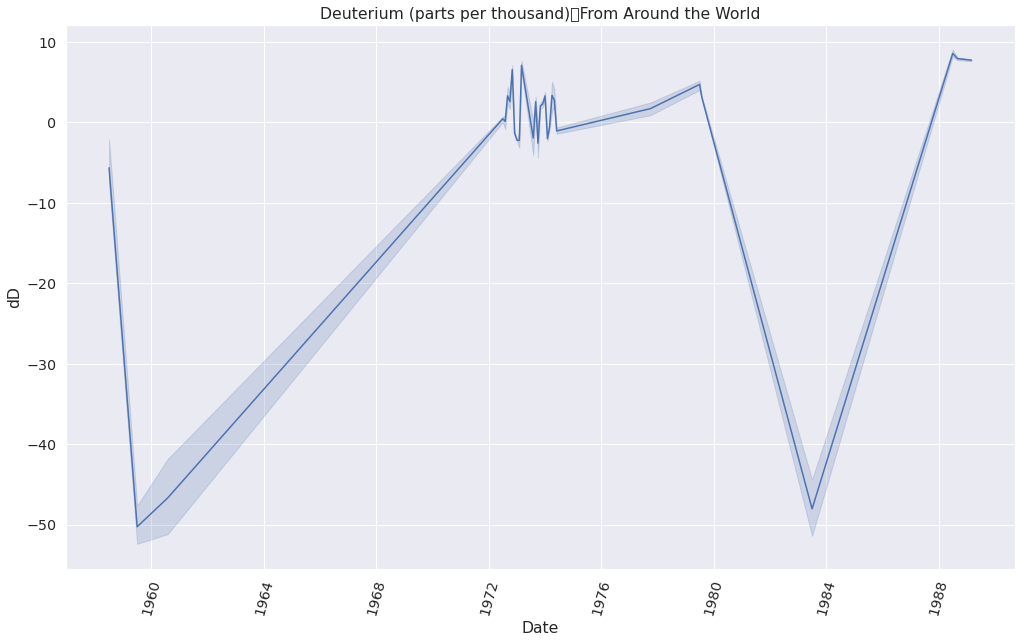

In [51]:

#Deuterium parts per thousand (heavy water)
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.dD)
plt.title("Deuterium (parts per thousand)	From Around the World")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


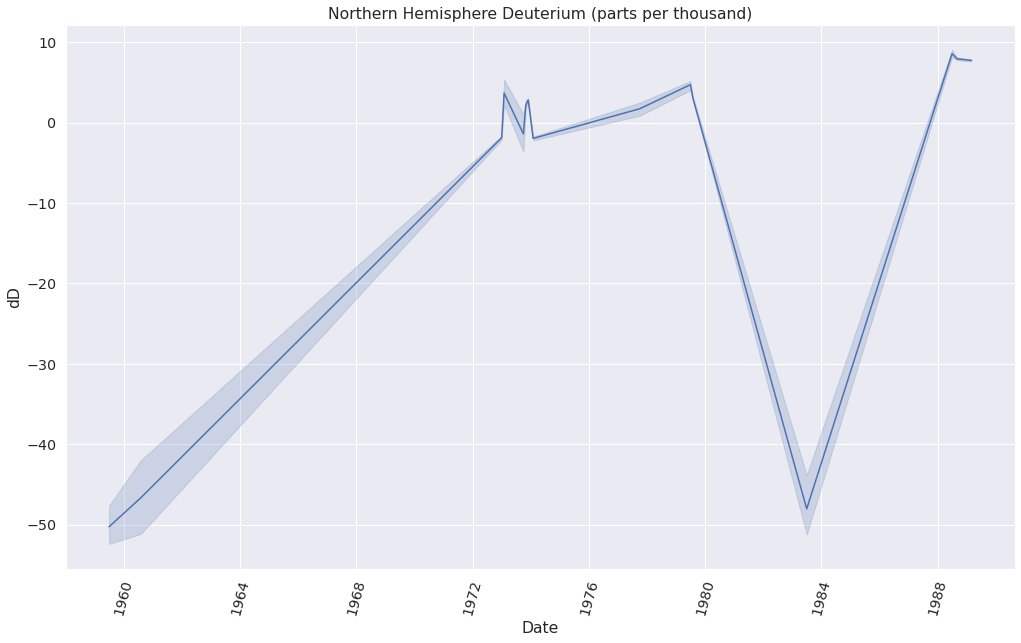

In [52]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.dD.where(clean_df['Longitude'] > 0))
plt.title("Northern Hemisphere Deuterium (parts per thousand)")
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


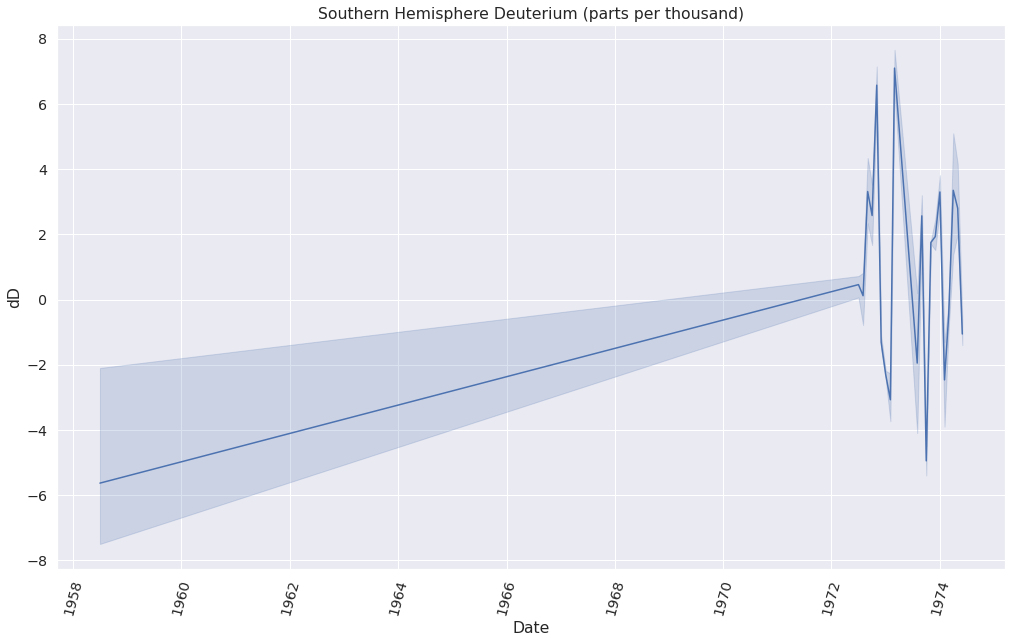

In [53]:
plt.figure(figsize=(17,10))
sns.lineplot(clean_df.index, clean_df.dD.where(clean_df['Longitude'] < 0))
plt.title("Southern Hemisphere Deuterium (parts per thousand)")
plt.xticks(rotation=75)
plt.show()

# Correlation 

In [54]:
mask = np.zeros_like(clean_df.corr())
tri = np.triu_indices_from(mask)
mask[tri] = True
mask


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

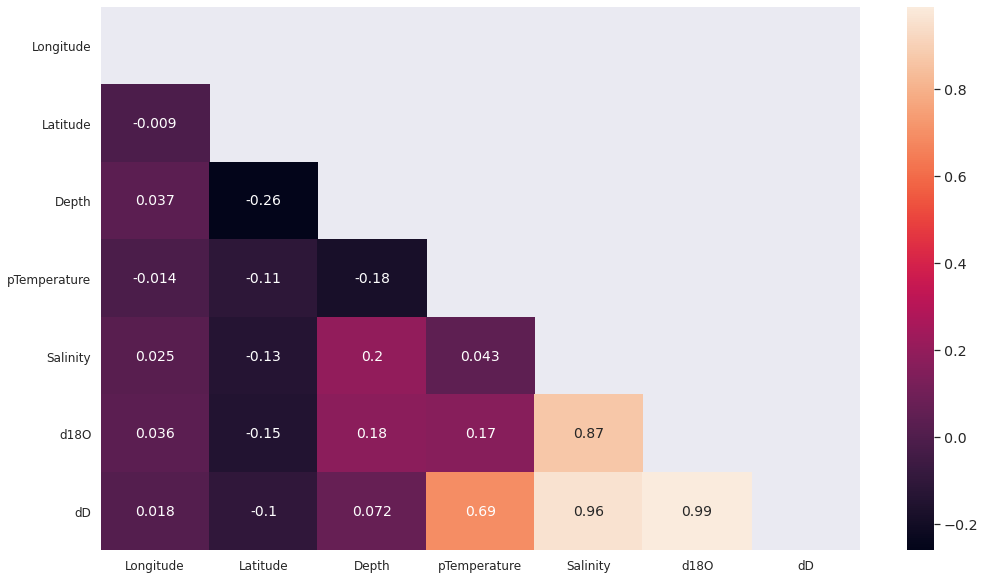

In [57]:
# Checking Correlation of features 
plt.figure(figsize=(17,10))
sns.heatmap(clean_df.corr(), mask=mask, annot=True, annot_kws={"size":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This dataset from NASA contains tens of thousands of observations of the levels of oxygen-18, an environmental isotope, in various locations in the ocean. In addition, most observations include data on the temperature, salinity, and more as well.

The mentioned above dataset from NASA had 25 109 rows and 10 columns. We first viewed the dataset and saw that most columns were of type object, and this included numerical columns and empty rows were fill with chars "**". In order to conduct our analysis, we prep and cleaned our data by converting selected columns for type float, replacing all instances of "**" with NAN and concatenated year and month column into a new Date column, and dropped the Year and Month columns. The Date column is also made the index of the dataset.
After cleaning the data, all the columns varied in length with dD column being the smallest, with 1005 rows.
We decided not to drop any rows with Nan, as these rows had other readings and would help with the analysis of the data.
After getting a description of the dataset, we found that the min value for Salinity column is -13 and Salinity is measured from 0. All other observations looked good.
The data set has a good spread of readings taken around the world, most readings are concentrated more in the Sothern Hemisphere.
The top Reference is Tan and Strain.
We look at a Time Series of the feature, Temperature, Salinity, Oxygen-18 and Deuterium (heavy water). We looked at the dataset as a whole and also looked at the Northern hemisphere and the Southern hemisphere.
For temperature the series returned different values in its's data, this is mainly because, the different oceans have different temperature, and the closer to the south pole the colder the temperature. The series showed no trend or seasonality.
The Salinity (PSU) readings remained above 10 in northern hemisphere and for the most part has been between 30 and 40. In the Southern hemisphere, the Salinity level also remained above 10 and for the most part has been between 30 and 35. We conclude by saying, the water in the North is saltier than the South
The oxygen-18 level is measured in part per thousand. In the Northern hemisphere the levels remained between -10 and 5, but most around -5 and 5. The levels show a sharp decrease every 5 years, from 1990 to 2000. The data also shows a lot of movement between 1980 and 1985, this may be because a lot of readings were taken around that time. In the Southern hemisphere level remain between -15 and 5, and we also see the same movement between 1980 and 1985 as seen in the north.
Deuterium (heavy water) column did not give us a good picture on the changes through the years, as out 25 000 rows only 1005 had readings. For this reason, we can't make an analysis on this data.
We looked at correlation, and saw that should we want to predict Oxygen levels or heavy water; Depth, Temperature, Salinity and Deuterium can be used as features, as they are closely correlated with each other.
